In [11]:
import numpy as np
import matplotlib.pyplot as plt

Зададим функцию $f_1 = \frac{x}{100} + \frac{sin(x)}{x}$

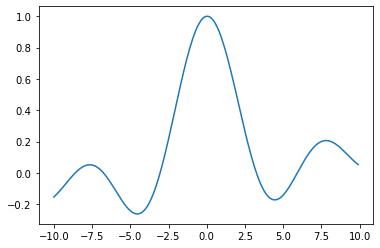

In [12]:
def f1(x):
    return x/100 + np.sin(x)/x

x = np.arange(-10, 10, 0.1)
y1 = f1(x)
plt.plot(x, y1)
plt.show()

Зададим функцию $f_2 = \sqrt{1 + \varepsilon + \frac{sin(x)}{x}}$

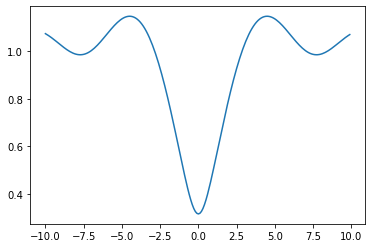

In [13]:
def f2(eps=0.1):
    def foo(x):
        res = (1 + eps - np.sin(x)/x) ** 0.5
        if res.shape == () and np.isnan(res):
            return eps ** 0.5
        return res
    return foo

x = np.arange(-10, 10, 0.1)
y2 = f2(eps = 0.1)(x)
plt.plot(x, y2)
plt.show()

Наглядное сравнение этих кривых при разном $\varepsilon$

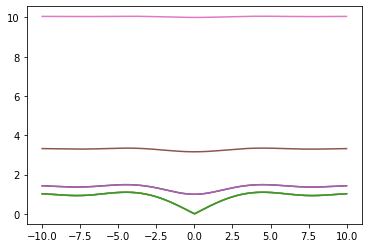

In [14]:

for eps in [0.000001, 0.0001, 0,1, 1, 10, 100]:
    f = f2(eps=eps)
    x = np.arange(-10, 10, 0.01)
    y = f(x)
    plt.plot(x, y)

plt.show()

#### Описание метода (немного отличается от того, что было на лекциях):

Пусть даны границы промежутка [a, b], где мы ищем минимум. Тогда точка (хотя не сильно важно какая по счету, если переобозначить a, b) пересечения лучей ищется по формулам
$$x_1 = \frac{f(a)-f(b)}{2L} + \frac{a+b}{2}$$
$$y_1 = \frac{f(a)+f(b)}{2} + \frac{L(a-b)}{2}$$

Этот узел ломанной обладает наименьшим y, он разбивается на 2 узла (это можно переписать следующим образом): путь
$$\Delta = \frac{f(x_1) - y_1}{2L},$$ тогда
$$x_2 = x_1 - \Delta$$
$$x_3 = x_1 + \Delta$$
$$y_{2, 3} = \frac{f(x_1) + y_1}{2}$$

 ##### https://sibsau.ru/sveden/edufiles/69561/

In [15]:
def min_search(f, a, b, L=0.5, eps=1e-3, N=1000):
    '''
    :param eps: точность приближения
    :param N: число итераций
    '''
    x = (f(a) - f(b)) / (2 * L) + (a + b) / 2
    y = (f(a) + f(b)) / 2 + L * (a - b) / 2
    q = [(x, y)]    # узлы ломанной не на кривой
    nodes = [(a, f(a)), (b, f(b))]    # узлы ломанной на кривой
    counter = 0
    while abs(f(x) - y) > eps and counter < N:
        q.remove((x, y))
        nodes.append((x, f(x)))
        delta = (f(x) - y) / (2 * L)
        x1 = x - delta
        x2 = x + delta
        yy = (f(x) + y) / 2
        q.extend([(x1, yy), (x2, yy)])
        counter += 1
        x, y = min(q, key= lambda x: x[1])
    print('made iterations:', counter)
    return q + nodes, counter

def plot_graph(f, all_nodes):
    all_nodes.sort(key=lambda x: x[0])
    xx = np.array([x[0] for x in all_nodes])
    yy = np.array([x[1] for x in all_nodes])
    plt.plot(xx, yy)
    x = np.arange(-10, 10, 0.01)
    y = f(x)
    plt.plot(x, y)
    plt.show()
    return min(y)


Посмотрим как алгоритм работает с $f_1$

made iterations: 133


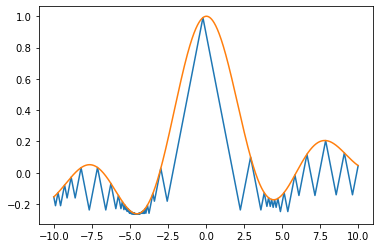

Минимум на ломанной: x=-4.543472, y=-0.263095
Эта точка на кривой имеет ординату f(x)=-0.262398
Настоящий минимум  y = -0.262400
Погрешность |f_min - y| = 0.000696




In [16]:
for f in [f1]:
    all_nodes, _ = min_search(f, -10, 10, L=0.5)
    real_min = plot_graph(f, all_nodes)
    x1, y1 = min(all_nodes, key=lambda x: x[1])
    print(f'Минимум на ломанной: x={x1:.6f}, y={y1:.6f}')
    print(f'Эта точка на кривой имеет ординату f(x)={f(x1):.6f}')
    print(f'Настоящий минимум  y = {real_min:.6f}')
    print(f'Погрешность |f_min - y| = {abs(real_min - y1):.6f}')
    # print(f'Погрешность epsilon1 = {abs(real_min - f(x1)):.6f}')
    print('\n')

Видно, что алгоритм сходится, значение в минимуме на ломанной сходится к абсолютному минимуму.

Теперь построим графики для второй функции при различных значениях epsilon

eps=1e-06
made iterations: 19


/tmp/ipykernel_6155/1822921099.py:3: RuntimeWarning: invalid value encountered in double_scalars
  res = (1 + eps - np.sin(x)/x) ** 0.5


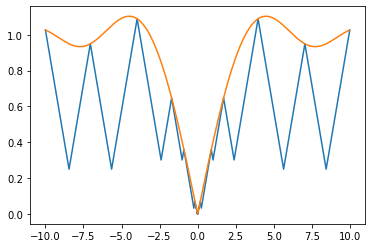

Минимум на ломанной: x=-0.002814, y=0.000680
Эта точка на кривой имеет ординату f(x)=0.001523
Настоящий минимум  y = 0.001000
Погрешность |f_min - y| = 0.000320


eps=0.0001
made iterations: 23


/tmp/ipykernel_6155/1822921099.py:3: RuntimeWarning: invalid value encountered in double_scalars
  res = (1 + eps - np.sin(x)/x) ** 0.5


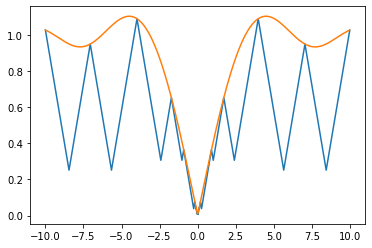

Минимум на ломанной: x=-0.004497, y=0.009299
Эта точка на кривой имеет ординату f(x)=0.010167
Настоящий минимум  y = 0.010000
Погрешность |f_min - y| = 0.000701


eps=0.01
made iterations: 43


/tmp/ipykernel_6155/1822921099.py:3: RuntimeWarning: invalid value encountered in double_scalars
  res = (1 + eps - np.sin(x)/x) ** 0.5


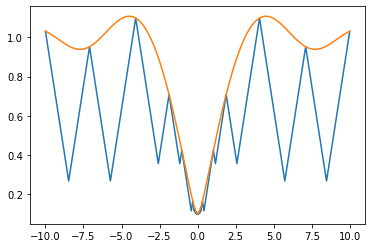

Минимум на ломанной: x=-0.005297, y=0.099124
Эта точка на кривой имеет ординату f(x)=0.100023
Настоящий минимум  y = 0.100000
Погрешность |f_min - y| = 0.000876


eps=0.1
made iterations: 88


/tmp/ipykernel_6155/1822921099.py:3: RuntimeWarning: invalid value encountered in double_scalars
  res = (1 + eps - np.sin(x)/x) ** 0.5


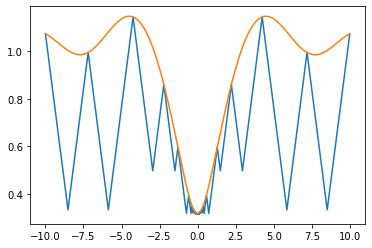

Минимум на ломанной: x=-0.035103, y=0.315584
Эта точка на кривой имеет ординату f(x)=0.316552
Настоящий минимум  y = 0.316228
Погрешность |f_min - y| = 0.000644


eps=1
made iterations: 159


/tmp/ipykernel_6155/1822921099.py:3: RuntimeWarning: invalid value encountered in double_scalars
  res = (1 + eps - np.sin(x)/x) ** 0.5


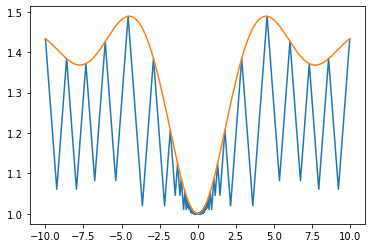

Минимум на ломанной: x=-0.003259, y=0.999457
Эта точка на кривой имеет ординату f(x)=1.000001
Настоящий минимум  y = 1.000000
Погрешность |f_min - y| = 0.000543


eps=10
made iterations: 243


/tmp/ipykernel_6155/1822921099.py:3: RuntimeWarning: invalid value encountered in double_scalars
  res = (1 + eps - np.sin(x)/x) ** 0.5


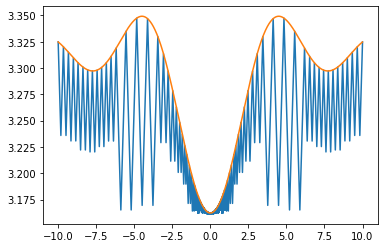

Минимум на ломанной: x=-0.005379, y=3.161381
Эта точка на кривой имеет ординату f(x)=3.162278
Настоящий минимум  y = 3.162278
Погрешность |f_min - y| = 0.000896


eps=100
made iterations: 567


/tmp/ipykernel_6155/1822921099.py:3: RuntimeWarning: invalid value encountered in double_scalars
  res = (1 + eps - np.sin(x)/x) ** 0.5


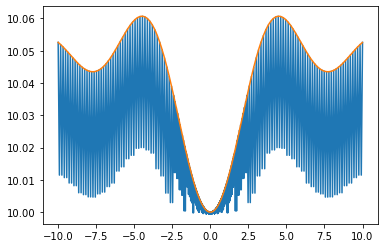

Минимум на ломанной: x=-0.003305, y=9.999449
Эта точка на кривой имеет ординату f(x)=10.000000
Настоящий минимум  y = 10.000000
Погрешность |f_min - y| = 0.000551




<function matplotlib.pyplot.show(close=None, block=None)>

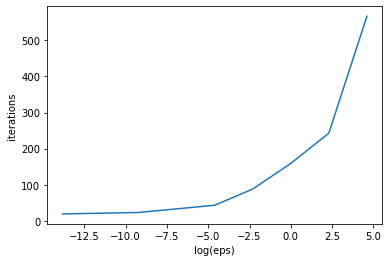

In [19]:
counters = []
all_eps = [0.000001, 0.0001, 0.01, 0.1, 1, 10, 100]
for eps in all_eps:
    f = f2(eps=eps)
    print(f'eps={eps}')
    all_nodes, counter = min_search(f, -10, 10)
    counters.append(counter)
    real_min = plot_graph(f, all_nodes)
    x1, y1 = min(all_nodes, key=lambda x: x[1])
    print(f'Минимум на ломанной: x={x1:.6f}, y={y1:.6f}')
    print(f'Эта точка на кривой имеет ординату f(x)={f(x1):.6f}')
    print(f'Настоящий минимум  y = {real_min:.6f}')
    print(f'Погрешность |f_min - y| = {abs(real_min - y1):.6f}')
    #print(f'Погрешность epsilon2 = {abs(real_min - f(x1)):.6f}')
    print('\n')

plt.plot(np.log(all_eps), counters)
plt.xlabel('log(eps)')
plt.ylabel('iterations')
plt.show

Видно, что в случае со 2й функцией чем меньше эпсилон, тем острее функция и тем меньше требуется итераций для достижения нужной точности. И при этом верно обратное - чем более пологая функция, тем больше итераций требуется для сходимости. В общем-то, это ожидаемый результат

Теперь давайте поиграемся с разными значениями $L$ и посмотрим на сходимость на второй функции

[0.05, 0.1, 0.15, 0.2, 0.35, 0.5, 0.8]
L=0.05
made iterations: 63


/tmp/ipykernel_6155/1822921099.py:3: RuntimeWarning: invalid value encountered in double_scalars
  res = (1 + eps - np.sin(x)/x) ** 0.5


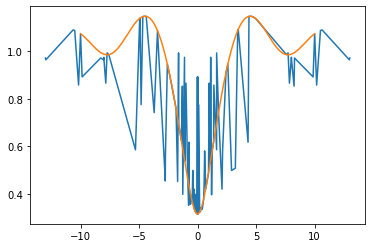

Минимум на ломанной: x=0.000000, y=0.316228
Эта точка на кривой имеет ординату f(x)=0.316228
Настоящий минимум  y = 0.316228
Погрешность |f_min - y| = 0.000000


L=0.1
made iterations: 15


/tmp/ipykernel_6155/1822921099.py:3: RuntimeWarning: invalid value encountered in double_scalars
  res = (1 + eps - np.sin(x)/x) ** 0.5


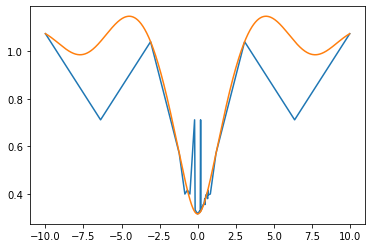

Минимум на ломанной: x=0.000000, y=0.316228
Эта точка на кривой имеет ординату f(x)=0.316228
Настоящий минимум  y = 0.316228
Погрешность |f_min - y| = 0.000000


L=0.15
made iterations: 27


/tmp/ipykernel_6155/1822921099.py:3: RuntimeWarning: invalid value encountered in double_scalars
  res = (1 + eps - np.sin(x)/x) ** 0.5


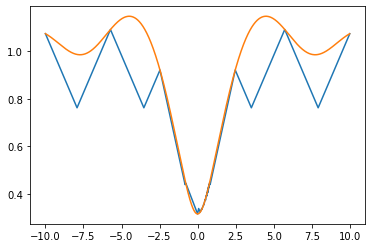

Минимум на ломанной: x=0.000000, y=0.316228
Эта точка на кривой имеет ординату f(x)=0.316228
Настоящий минимум  y = 0.316228
Погрешность |f_min - y| = 0.000000


L=0.2
made iterations: 6


/tmp/ipykernel_6155/1822921099.py:3: RuntimeWarning: invalid value encountered in double_scalars
  res = (1 + eps - np.sin(x)/x) ** 0.5


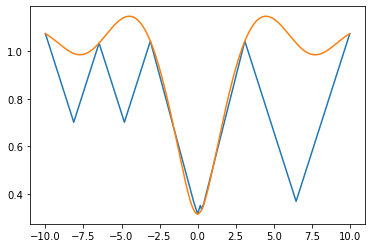

Минимум на ломанной: x=0.000000, y=0.316228
Эта точка на кривой имеет ординату f(x)=0.316228
Настоящий минимум  y = 0.316228
Погрешность |f_min - y| = 0.000000


L=0.35
made iterations: 55


/tmp/ipykernel_6155/1822921099.py:3: RuntimeWarning: invalid value encountered in double_scalars
  res = (1 + eps - np.sin(x)/x) ** 0.5


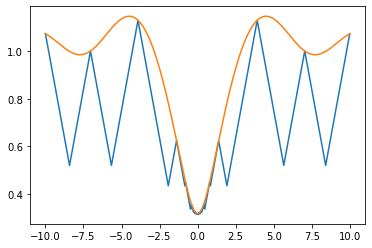

Минимум на ломанной: x=-0.007288, y=0.315382
Эта точка на кривой имеет ординату f(x)=0.316242
Настоящий минимум  y = 0.316228
Погрешность |f_min - y| = 0.000846


L=0.5
made iterations: 88


/tmp/ipykernel_6155/1822921099.py:3: RuntimeWarning: invalid value encountered in double_scalars
  res = (1 + eps - np.sin(x)/x) ** 0.5


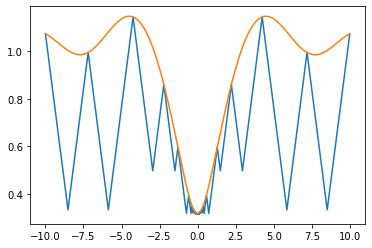

/tmp/ipykernel_6155/1822921099.py:3: RuntimeWarning: invalid value encountered in double_scalars
  res = (1 + eps - np.sin(x)/x) ** 0.5


Минимум на ломанной: x=-0.035103, y=0.315584
Эта точка на кривой имеет ординату f(x)=0.316552
Настоящий минимум  y = 0.316228
Погрешность |f_min - y| = 0.000644


L=0.8
made iterations: 143


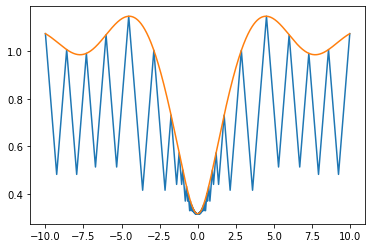

Минимум на ломанной: x=-0.002528, y=0.315554
Эта точка на кривой имеет ординату f(x)=0.316229
Настоящий минимум  y = 0.316228
Погрешность |f_min - y| = 0.000674




<function matplotlib.pyplot.show(close=None, block=None)>

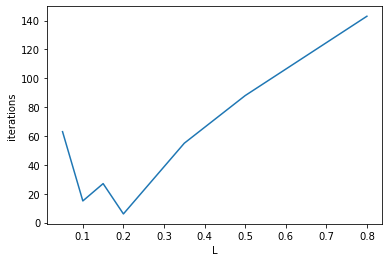

In [18]:
f = f2(eps=0.1)
counters = []
all_L = [0.05, 0.1, 0.15, 0.2, 0.35, 0.5, 0.8]
print(all_L)
for L in all_L:
    print(f'L={L}')
    all_nodes, counter = min_search(f, -10, 10, L=L)
    counters.append(counter)
    real_min = plot_graph(f, all_nodes)
    x1, y1 = min(all_nodes, key=lambda x: x[1])
    print(f'Минимум на ломанной: x={x1:.6f}, y={y1:.6f}')
    print(f'Эта точка на кривой имеет ординату f(x)={f(x1):.6f}')
    print(f'Настоящий минимум  y = {real_min:.6f}')
    print(f'Погрешность |f_min - y| = {abs(real_min - y1):.6f}')
    # print(f'Погрешность epsilon1 = {abs(real_min - f(x1)):.6f}')
    print('\n')

plt.plot(all_L, counters)
plt.xlabel('L')
plt.ylabel('iterations')
plt.show

Если посмотреть значение $L$ для $f_2$, то оно будет около 0.2. На этом графике видно, что минимум итераций получается как раз где-то около $L=0.2$

Таким образом, мы реализовали метод ломанной и посмотрели на его работу с разными функциями. Видно, что алгоритм сходится к настоящему минимуму. Кроме того, было замечено, что чем более плоская функция, тем больше требуется итераций. Также, наибольшая скорость сходимости достигается при точной нижней границе для $L$
